In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [3]:
df = pd.read_csv('/content/drive/My Drive/University/UIU/11-Summer 2020/Pattern Lab/Papers and datasets/Datasets for 224/Image Augmentation on FER/fer2013.csv')
print(df.shape)

(35887, 3)


In [4]:
print(df.columns)

Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Processing disgust class

In [6]:
#selecting rows with disgust as labels
dgst_sam = df.loc[df['emotion'] == 1]
dgst_sam.head()

,emotion,pixels,Usage
299,1,126 126 129 120 110 168 174 172 173 174 170 15...,Training
388,1,89 55 24 40 43 48 53 55 59 41 33 31 22 32 42 4...,Training
416,1,204 195 181 131 50 50 57 56 66 98 138 161 173 ...,Training
473,1,14 11 13 12 41 95 113 112 111 122 132 137 142 ...,Training
533,1,18 25 49 75 89 97 100 100 101 103 105 107 107 ...,Training


In [7]:
pixels = dgst_sam.loc[:,'pixels'].values
y = dgst_sam.loc[:, 'emotion'].values

print(y.shape)
print(pixels.shape)

(547,)
(547,)


##Transforming pixels in the right format

In [8]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [9]:
px = []
for x in pixels : 
    x = word_tokenize(x)
    x = [float(t) for t in x]
    px.append(x)

In [10]:
x = np.array(px)
print(x.shape)

(547, 2304)


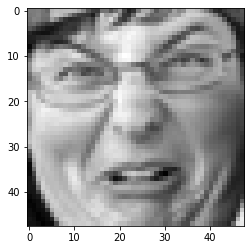

In [12]:
plt.imshow(x[0].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [13]:
#conversion 1D array of pixels into a 2D numpy array
x = x.reshape((x.shape[0],48, 48,1 ))
print (x.shape)

(547, 48, 48, 1)


## Image Augmentation


## Rotation

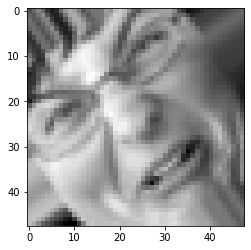

In [14]:
datagen=ImageDataGenerator(
    rotation_range=180
)
imagegen=datagen.flow(x, batch_size=547, shuffle=False)
x1=imagegen.next()

plt.imshow(x1[0].reshape((48, 48)), cmap='gray')
plt.show()


## Height Shift

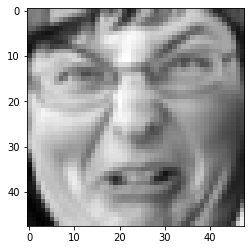

In [15]:
datagen=ImageDataGenerator(
    height_shift_range=0.25
)
imagegen=datagen.flow(x, batch_size=547, shuffle=False)
x2=imagegen.next()

plt.imshow(x2[0].reshape((48, 48)), cmap='gray')
plt.show()


## Width Shift

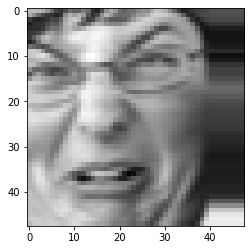

In [16]:
datagen=ImageDataGenerator(
    width_shift_range=0.35
)

imagegen=datagen.flow(x, batch_size=547, shuffle=False)
x3=imagegen.next()

plt.imshow(x3[0].reshape((48, 48)), cmap='gray')
plt.show()

## Horizontal Flip

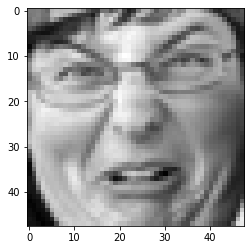

In [17]:
datagen = ImageDataGenerator(
     horizontal_flip = True
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x4 = imagegen.next()

plt.imshow(x4[0].reshape((48, 48)), cmap='gray')
plt.show()

## Vertical Shift

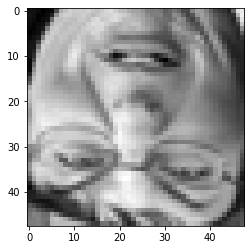

In [18]:
datagen = ImageDataGenerator(
     vertical_flip = True
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x5 = imagegen.next()

plt.imshow(x5[0].reshape((48, 48)), cmap='gray')
plt.show()

## Shear Intensity

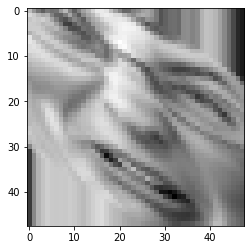

In [19]:
datagen = ImageDataGenerator(
     shear_range = 60
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x6 = imagegen.next()

plt.imshow(x6[0].reshape((48, 48)), cmap='gray')
plt.show()

## Zoom Range

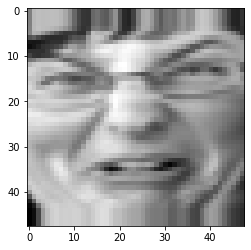

In [20]:
datagen = ImageDataGenerator(
      zoom_range = [0.8, 1.2]
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x7 = imagegen.next()

plt.imshow(x7[0].reshape((48, 48)), cmap='gray')
plt.show()

## Brightness Level

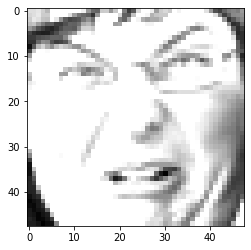

In [21]:
datagen = ImageDataGenerator(
      brightness_range=[0,2]
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x8 = imagegen.next()

plt.imshow(x8[0].reshape((48, 48)), cmap='gray')
plt.show()

## Rescaling

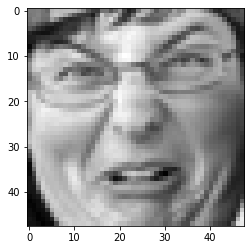

In [22]:
datagen = ImageDataGenerator(
      rescale=1/255
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x9 = imagegen.next()

plt.imshow(x9[0].reshape((48, 48)), cmap='gray')
plt.show()

## Channel Shift

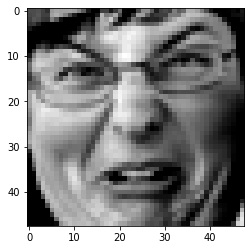

In [23]:
datagen = ImageDataGenerator(
      channel_shift_range=100
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x10 = imagegen.next()

plt.imshow(x10[0].reshape((48, 48)), cmap='gray')
plt.show()

## combining the augmented dataset

In [24]:
aug_x = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10), axis=0)
print(aug_x.shape)

(5470, 48, 48, 1)


In [25]:
#total disgust data
new_disgust_data = np.concatenate((x, aug_x), axis=0)
print(new_disgust_data.shape)

(6017, 48, 48, 1)


In [26]:
disgust_y = np.array([1]*6017)
print(disgust_y.shape)

(6017,)


## Creating a new dataset with augmented images

In [27]:
#selecting rows with disgust as labels
non_dgst_sam = df.loc[df['emotion'] != 1]
non_dgst_sam.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [28]:
non_dgst_sam.shape

(35340, 3)

In [29]:
rest_pixels = non_dgst_sam.loc[:,'pixels'].values
rest_y = non_dgst_sam.loc[:, 'emotion'].values

print(rest_y.shape)
print(rest_pixels.shape)

(35340,)
(35340,)


In [30]:
new_px = []
for x in rest_pixels : 
    x1 = word_tokenize(x)
    x1 = [float(t) for t in x1]
    new_px.append(x1)

In [31]:
new_x = np.array(new_px)
print(new_x.shape)

(35340, 2304)


In [32]:
#conversion 1D array of pixels into a 2D numpy array
new_x = new_x.reshape((new_x.shape[0],48, 48,1 ))
print (new_x.shape)

(35340, 48, 48, 1)


In [56]:
#total data
total_X = np.concatenate((new_x, new_disgust_data), axis=0)
print(total_X.shape)

(41357, 48, 48, 1)


In [39]:
total_y = np.concatenate((rest_y, disgust_y), axis=0)
total_y=np.vstack(total_y)
print(np.shape(total_y))

(41357, 1)


## Importing necessary libraries

In [57]:
import tensorflow as tf
#!pip install --upgrade keras
from keras.layers import *
from keras.layers import Concatenate
from keras.models import Sequential, Model
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from PIL import Image

## Converting input channels to 3

In [58]:
class Gray2VGGInput( Layer ) :
    """Custom conversion layer
    """
    def build( self, x ) :
        self.image_mean = K.variable(value=np.array([103.939, 116.779, 123.68]).reshape([1,1,1,3]).astype('float32'), 
                                     dtype='float32', 
                                     name='imageNet_mean' )
        self.built = True
        return
    def call( self, x ) :
        rgb_x = K.concatenate( [x,x,x], axis=-1 )
        norm_x = rgb_x - self.image_mean
        return norm_x
    def compute_output_shape( self, input_shape ) :
        return input_shape[:3] + (3,)


## Categorical values conversion, Train-test split

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

oneHotEnc = OneHotEncoder()
c=np.array([[0],[1],[2],[3],[4],[5],[6]])
oneHotEnc.fit(c)
ency=oneHotEnc.transform(total_y)
ency.reshape(-1, 1)
xtrain, X_validate, ytrain, y_validate = train_test_split(total_X, ency, test_size=0.2, random_state=0)
#del items

#print(type(ytrain))
#print(type(y_validate))

ytrain = ytrain.todense()
y_validate = y_validate.todense()

# 3. convert to VGG input
xtrain = Gray2VGGInput( name='gray_to_rgb_norm')(xtrain)
X_validate = Gray2VGGInput( name='gray_to_rgb_norm')(X_validate)

print(xtrain.shape)
print(X_validate.shape)



tf.convert_to_tensor(xtrain, dtype=None, dtype_hint=None, name=None)
tf.convert_to_tensor(ytrain, dtype=None, dtype_hint=None, name=None)
tf.convert_to_tensor(X_validate, dtype=None, dtype_hint=None, name=None)
tf.convert_to_tensor(y_validate, dtype=None, dtype_hint=None, name=None)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(33085, 48, 48, 

<tf.Tensor: shape=(8272, 7), dtype=float64, numpy=
array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])>

## VGG-16

In [63]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(
  weights='imagenet',
  include_top=False,
  input_shape= (48,48,3)
)
def build_model(backbone):
  model = Sequential()
  model.add(backbone)
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(7, activation='softmax')) #output_dim = 7
  
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
  )
  return model
  
vgg_top = build_model(vgg)

#earlyStop=EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=0)

#vgg_top.fit(xtrain,ytrain,epochs=25,batch_size=16,validation_data=(X_validate,y_validate),callbacks=[earlyStop,check])

58892288/58889256 [==============================] - 2s 0us/step


In [64]:
vgg_top.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

In [65]:
vgg_top.fit(xtrain,ytrain,epochs=75,batch_size=16,validation_data=(X_validate,y_validate))

Epoch 1/75
2068/2068 [==============================] - 42s 21ms/step - loss: 1.8307 - acc: 0.2612 - val_loss: 1.7378 - val_acc: 0.3069
Epoch 2/75
2068/2068 [==============================] - 42s 20ms/step - loss: 1.7100 - acc: 0.3175 - val_loss: 1.7285 - val_acc: 0.3239
Epoch 3/75
2068/2068 [==============================] - 42s 20ms/step - loss: 1.6350 - acc: 0.3560 - val_loss: 1.5920 - val_acc: 0.3722
Epoch 4/75
2068/2068 [==============================] - 42s 20ms/step - loss: 1.5499 - acc: 0.3901 - val_loss: 1.5569 - val_acc: 0.3854
Epoch 5/75
2068/2068 [==============================] - 42s 20ms/step - loss: 1.4788 - acc: 0.4154 - val_loss: 1.5963 - val_acc: 0.3633
Epoch 6/75
2068/2068 [==============================] - 42s 20ms/step - loss: 1.4610 - acc: 0.4218 - val_loss: 1.4636 - val_acc: 0.4287
Epoch 7/75
2068/2068 [==============================] - 42s 20ms/step - loss: 1.3993 - acc: 0.4521 - val_loss: 2.3085 - val_acc: 0.2924
Epoch 8/75
2068/2068 [==========================

In [66]:
vgg_top.fit(xtrain,ytrain,epochs=25,batch_size=16,validation_data=(X_validate,y_validate)) # train few more epochs

Epoch 1/25
2068/2068 [==============================] - 42s 20ms/step - loss: 1.9178 - acc: 0.2177 - val_loss: 1.9169 - val_acc: 0.2160
Epoch 2/25
2068/2068 [==============================] - 42s 21ms/step - loss: 1.9178 - acc: 0.2177 - val_loss: 1.9165 - val_acc: 0.2160
Epoch 3/25
2068/2068 [==============================] - 42s 20ms/step - loss: 1.9179 - acc: 0.2177 - val_loss: 1.9164 - val_acc: 0.2160
Epoch 4/25
2068/2068 [==============================] - 42s 20ms/step - loss: 1.9179 - acc: 0.2177 - val_loss: 1.9164 - val_acc: 0.2160
Epoch 5/25
2068/2068 [==============================] - 42s 20ms/step - loss: 1.9178 - acc: 0.2177 - val_loss: 1.9163 - val_acc: 0.2160
Epoch 6/25
2068/2068 [==============================] - 42s 20ms/step - loss: 1.9178 - acc: 0.2177 - val_loss: 1.9162 - val_acc: 0.2160
Epoch 7/25
2068/2068 [==============================] - 42s 20ms/step - loss: 1.9178 - acc: 0.2177 - val_loss: 1.9164 - val_acc: 0.2160
Epoch 8/25
2068/2068 [==========================

In [68]:
vgg_top.save('vgg-frontal-crop2.hdf5') 
vgg_top = load_model("vgg-frontal-crop2.hdf5")
vgg_top.evaluate(X_validate,y_validate)

259/259 [==============================] - 2s 8ms/step - loss: 1.9165 - acc: 0.2160


[1.9164551496505737, 0.21602998673915863]

## ResNet50

In [69]:
from keras.applications.resnet50 import ResNet50

resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape= (48,48,3),
    )

def build_model(backbone):
  model = Sequential()
  model.add(backbone)
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(7, activation='softmax')) #output_dim = 7
  
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
  )
  return model
resnet_top = build_model(resnet)

94773248/94765736 [==============================] - 2s 0us/step


In [70]:
resnet_top.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)              

In [71]:
resnet_top.fit(xtrain,ytrain,epochs=75,batch_size=16,validation_data=(X_validate,y_validate))

Epoch 1/75
2068/2068 [==============================] - 71s 34ms/step - loss: 1.7141 - acc: 0.3412 - val_loss: 1.6169 - val_acc: 0.3796
Epoch 2/75
2068/2068 [==============================] - 69s 33ms/step - loss: 1.5490 - acc: 0.4216 - val_loss: 1.5089 - val_acc: 0.4478
Epoch 3/75
2068/2068 [==============================] - 69s 33ms/step - loss: 1.4974 - acc: 0.4383 - val_loss: 3.6766 - val_acc: 0.2348
Epoch 4/75
2068/2068 [==============================] - 69s 33ms/step - loss: 1.4862 - acc: 0.4390 - val_loss: 1.3790 - val_acc: 0.4752
Epoch 5/75
2068/2068 [==============================] - 69s 33ms/step - loss: 1.3463 - acc: 0.4961 - val_loss: 1.4462 - val_acc: 0.4576
Epoch 6/75
2068/2068 [==============================] - 70s 34ms/step - loss: 1.2494 - acc: 0.5373 - val_loss: 1.2045 - val_acc: 0.5468
Epoch 7/75
2068/2068 [==============================] - 69s 33ms/step - loss: 1.2366 - acc: 0.5382 - val_loss: 1.4182 - val_acc: 0.5076
Epoch 8/75
2068/2068 [==========================

In [72]:
resnet_top.save('resnet-frontal-crop2.hdf5') 
resnet_top = load_model("resnet-frontal-crop2.hdf5")
resnet_top.evaluate(X_validate, y_validate)

259/259 [==============================] - 4s 14ms/step - loss: 2.1354 - acc: 0.6290


[2.1353564262390137, 0.6289893388748169]